This notebook deals with the contents in Section 4.4.12.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from cmdstanpy import CmdStanModel

# Load and show data

In [2]:
df = pd.read_csv("./data/data-salary.txt")
print(df.count())
df.head(5)

X    20
Y    20
dtype: int64


,X,Y
0,24,472
1,24,403
2,26,454
3,32,575
4,33,546


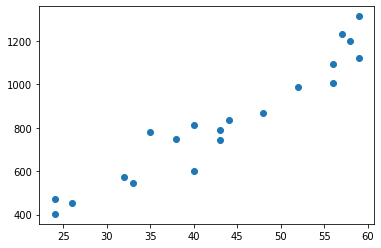

In [3]:
plt.plot(df["X"], df["Y"], 'o')

In [4]:
X_new = np.arange(23, 61, 1)
X_new

array([23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60])

# Run Stan

In [5]:
model = CmdStanModel(stan_file="model/model4-4.stan")
print(model)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /workdir/Chap04/model/model4-4


CmdStanModel: name=model4-4
	 stan_file=/workdir/Chap04/model/model4-4.stan
	 exe_file=/workdir/Chap04/model/model4-4
	 compiler_optons=stanc_options=None, cpp_options=None


In [6]:
data = {
    "N": len(df),
    "X": df["X"].values,
    "Y": df["Y"].values,
    "N_new": len(X_new), 
    "X_new": X_new
}

In [7]:
# sampling
fit = model.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2


You can run a stan model whose model file does not contain `generated quantities` blocks, and then using another stan file with `generated quantities` block to generate quantities using `model.generate_quantities` method.

See https://cmdstanpy.readthedocs.io/en/latest/generate_quantities.html for detail.

# Access the result

In [8]:
type(fit)

cmdstanpy.stanfit.CmdStanMCMC

In [9]:
fit

CmdStanMCMC: model=model4-4 chains=4['method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 csv_files:
	/tmp/tmp7suizxlq/model4-4-202009090610-1-bxaqmz4b.csv
	/tmp/tmp7suizxlq/model4-4-202009090610-2-ybubiacq.csv
	/tmp/tmp7suizxlq/model4-4-202009090610-3-rnkxmnfl.csv
	/tmp/tmp7suizxlq/model4-4-202009090610-4-xccax4sd.csv
 output_files:
	/tmp/tmp7suizxlq/model4-4-202009090610-1-bxaqmz4b-stdout.txt
	/tmp/tmp7suizxlq/model4-4-202009090610-2-ybubiacq-stdout.txt
	/tmp/tmp7suizxlq/model4-4-202009090610-3-rnkxmnfl-stdout.txt
	/tmp/tmp7suizxlq/model4-4-202009090610-4-xccax4sd-stdout.txt

In [10]:
print(fit.chains)
print(fit.chain_ids)

4
[1, 2, 3, 4]


In [11]:
print(fit.num_draws)
print(fit.draws().shape)

1000
(1000, 4, 106)


In [12]:
print(fit.column_names)

('lp__', 'accept_stat__', 'stepsize__', 'treedepth__', 'n_leapfrog__', 'divergent__', 'energy__', 'a', 'b', 'sigma', 'y_base.1', 'y_base.2', 'y_base.3', 'y_base.4', 'y_base.5', 'y_base.6', 'y_base.7', 'y_base.8', 'y_base.9', 'y_base.10', 'y_base.11', 'y_base.12', 'y_base.13', 'y_base.14', 'y_base.15', 'y_base.16', 'y_base.17', 'y_base.18', 'y_base.19', 'y_base.20', 'y_base_new.1', 'y_base_new.2', 'y_base_new.3', 'y_base_new.4', 'y_base_new.5', 'y_base_new.6', 'y_base_new.7', 'y_base_new.8', 'y_base_new.9', 'y_base_new.10', 'y_base_new.11', 'y_base_new.12', 'y_base_new.13', 'y_base_new.14', 'y_base_new.15', 'y_base_new.16', 'y_base_new.17', 'y_base_new.18', 'y_base_new.19', 'y_base_new.20', 'y_base_new.21', 'y_base_new.22', 'y_base_new.23', 'y_base_new.24', 'y_base_new.25', 'y_base_new.26', 'y_base_new.27', 'y_base_new.28', 'y_base_new.29', 'y_base_new.30', 'y_base_new.31', 'y_base_new.32', 'y_base_new.33', 'y_base_new.34', 'y_base_new.35', 'y_base_new.36', 'y_base_new.37', 'y_base_new.

In [13]:
fit.stan_variables()

{'a': array([-251.859 , -129.214 ,  -13.8509, ..., -177.371 ,  -88.8002,
         -82.0179]),
 'b': array([24.4894, 22.5635, 19.6231, ..., 23.2654, 20.6233, 20.9542]),
 'sigma': array([67.024 , 80.0019, 75.9314, ..., 77.1179, 81.9173, 86.567 ]),
 'y_base': array([[ 335.886,  335.886,  384.865, ..., 1168.53 , 1193.01 , 1193.01 ],
        [ 412.31 ,  412.31 ,  457.437, ..., 1179.47 , 1202.03 , 1202.03 ],
        [ 457.102,  457.102,  496.349, ..., 1124.29 , 1143.91 , 1143.91 ],
        ...,
        [ 380.998,  380.998,  427.529, ..., 1172.02 , 1195.29 , 1195.29 ],
        [ 406.159,  406.159,  447.406, ..., 1107.35 , 1127.97 , 1127.97 ],
        [ 420.884,  420.884,  462.792, ..., 1133.33 , 1154.28 , 1154.28 ]]),
 'y_base_new': array([[ 311.397,  335.886,  360.375, ..., 1168.53 , 1193.01 , 1217.5  ],
        [ 389.747,  412.31 ,  434.874, ..., 1179.47 , 1202.03 , 1224.6  ],
        [ 437.479,  457.102,  476.726, ..., 1124.29 , 1143.91 , 1163.53 ],
        ...,
        [ 357.733,  380.998

In [14]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-93.5884,0.038030,1.28770,-96.1646,-93.2438,-92.20120,1146.51,2135.03,1.00371
a,-121.5160,1.993530,74.06040,-245.1040,-121.2450,-1.07713,1380.15,2570.10,1.00092
b,21.9535,0.044993,1.66297,19.2109,21.9565,24.77950,1366.06,2543.88,1.00090
sigma,84.9525,0.426722,15.07910,63.9234,82.9276,111.85000,1248.70,2325.32,1.00181
y_base[1],405.0000,0.940000,37.00000,344.0000,405.0000,466.00000,1533.00,2855.00,1.00000
...,...,...,...,...,...,...,...,...,...
y_new[34],1108.0000,1.500000,89.00000,962.0000,1110.0000,1251.00000,3642.00,6783.00,1.00000
y_new[35],1131.0000,1.400000,91.00000,981.0000,1131.0000,1282.00000,4143.00,7715.00,1.00000
y_new[36],1150.0000,1.500000,90.00000,1005.0000,1148.0000,1300.00000,3755.00,6993.00,1.00000


# Diagnostics

In [15]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmp7suizxlq/model4-4-202009090610-1-bxaqmz4b.csv, /tmp/tmp7suizxlq/model4-4-202009090610-2-ybubiacq.csv, /tmp/tmp7suizxlq/model4-4-202009090610-3-rnkxmnfl.csv, /tmp/tmp7suizxlq/model4-4-202009090610-4-xccax4sd.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmp7suizxlq/model4-4-202009090610-1-bxaqmz4b.csv, /tmp/tmp7suizxlq/model4-4-202009090610-2-ybubiacq.csv, /tmp/tmp7suizxlq/model4-4-202009090610-3-rnkxmnfl.csv, /tmp/tmp7suizxlq/model4-4-202009090610-4-xccax4sd.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


# Predictive distribution

Manually calculate predictive distribution from posterior samples

In [16]:
for key, val in fit.stan_variables().items():
    print(key, val.shape)

a (4000,)
b (4000,)
sigma (4000,)
y_base (4000, 20)
y_base_new (4000, 38)
y_new (4000, 38)


In [17]:
y_base_new_percentiles = np.percentile(fit.stan_variables("y_base_new"), [2.5, 25.0, 50.0, 75.0, 97.5], axis=0)
y_new_percentiles = np.percentile(fit.stan_variables("y_new"), [2.5, 25.0, 50.0, 75.0, 97.5], axis=0)

y_base_new_percentiles.shape, y_new_percentiles.shape

((5, 38), (5, 38))

Text(0.5, 1.0, 'y')

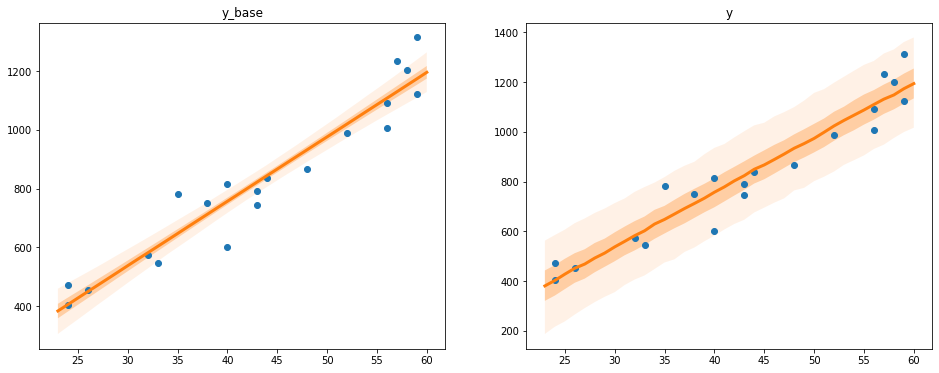

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

ax = axes[0]
ax.plot(df["X"], df["Y"], "o")
ax.fill_between(X_new, y_base_new_percentiles[0], y_base_new_percentiles[4], facecolor="C1", alpha=0.1)
ax.fill_between(X_new, y_base_new_percentiles[1], y_base_new_percentiles[3], facecolor="C1", alpha=0.3)
ax.plot(X_new, y_base_new_percentiles[2], color="C1", linewidth=3)
ax.set_title("y_base")

ax = axes[1]
ax.plot(df["X"], df["Y"], "o")
ax.fill_between(X_new, y_new_percentiles[0], y_new_percentiles[4], facecolor='C1', alpha=0.1)
ax.fill_between(X_new, y_new_percentiles[1], y_new_percentiles[3], facecolor='C1', alpha=0.3)
ax.plot(X_new, y_new_percentiles[2], color="C1", linewidth=3)
ax.set_title("y")